In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 任务2.1分析会员年龄构成，男女比例等基本信息 

In [2]:
# 读取预处理后的会员信息表
member = pd.read_csv('temp/member_pre.csv')

In [3]:
# 将日期转换为datetime格式
member['csrq'] = pd.to_datetime(member['csrq'])
member['djsj'] = pd.to_datetime(member['djsj'])

统计会员的年龄构成

In [4]:
# 将会员的出生日期转换为年龄（以虚岁算）
member['nl'] = member['csrq'].apply(lambda x:2018 - x.year)

In [5]:
member['nl'].describe()

count    136311.000000
mean         41.496864
std          10.335766
min           8.000000
25%          33.000000
50%          41.000000
75%          49.000000
max          98.000000
Name: nl, dtype: float64

In [6]:
# 将年龄段离散化,0-39岁为青年,40-59岁为中年，60岁以上为老年
bins = [np.min(member['nl'].values), 40, 60, np.max(member['nl'].values) + 1]
labels = ['青年','中年','老年']
member['nld'] = pd.cut(member['nl'],bins = bins,labels = ['青年','中年','老年'])

In [7]:
member.head(10)

,kh,csrq,xb,djsj,nl,nld
0,c68b20b4,2002-11-02,0.0,2013-05-11 00:00:00.000,16,青年
1,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,51,中年
2,2ab88539,1982-06-01,0.0,2010-11-19 00:00:00.000,36,青年
3,b4c77269,1964-02-05,0.0,2007-12-14 00:00:00.000,54,中年
4,83a91070,1968-06-18,1.0,2004-05-01 16:50:13.950,50,中年
5,34c2dc93,1986-07-18,0.0,2007-04-19 00:00:00.000,32,青年
6,a2e649aa,1960-07-13,0.0,2007-12-01 00:00:00.000,58,中年
7,54c044af,1982-06-22,0.0,2005-09-10 13:36:45.146,36,青年
8,828aa9b4,1951-12-29,0.0,2004-09-24 16:39:08.716,67,老年
9,2bde7c95,1978-04-16,0.0,2008-11-06 00:00:00.000,40,青年


In [8]:
age_dis = [np.sum(member['nld'] == '青年'),
           np.sum(member['nld'] == '中年'),
           np.sum(member['nld'] == '老年')]


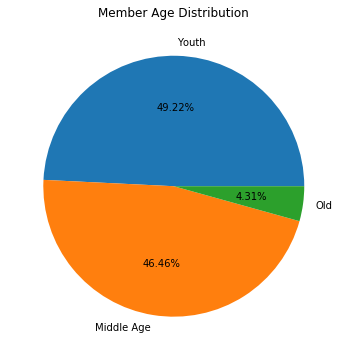

In [9]:
plt.figure(figsize = (6,6))
plt.pie(age_dis,labels = ['Youth','Middle Age','Old'],autopct = '%1.2f%%')
plt.title('Member Age Distribution')
plt.show()

统计不同年龄段的消费金额

In [10]:
# 读取预处理过的销售流水表数据
order = pd.read_csv('temp/order_pre.csv')
order['dtime'] = pd.to_datetime(order['dtime'])

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# 合并数据
whole_1 = pd.merge(member, order, on = 'kh')


In [12]:
# 获取不同年龄段消费金额之总
period_pay = [
    np.sum(whole_1[whole_1['nld'] == '青年']['je']),
    np.sum(whole_1[whole_1['nld'] == '中年']['je']),
    np.sum(whole_1[whole_1['nld'] == '老年']['je'])
]


In [13]:
period_pay

[204965907.95000002, 372865960.13, 15894786.110000001]

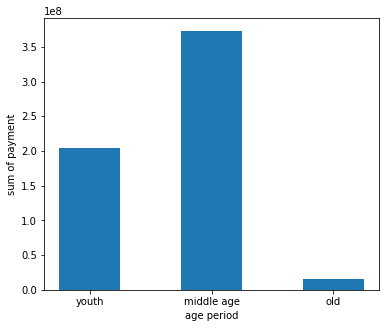

In [14]:
plt.figure(figsize = (6,5))
plt.bar(range(3), period_pay, width = 0.5)
plt.xlabel('age period')
plt.ylabel('sum of payment')
plt.xticks(range(3), ['youth','middle age','old'])
plt.show()

统计会员性别人数比例

In [15]:
male_num = len(member[member['xb'] == 1])
female_num = len(member[member['xb'] == 0])
print('男性：',male_num,' 女性：',female_num)

男性： 29356  女性： 106955


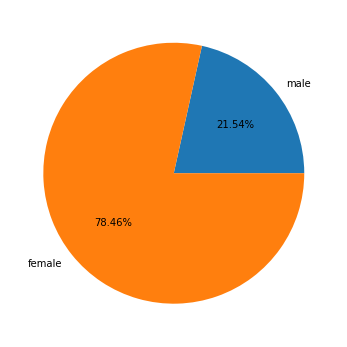

In [16]:
plt.figure(figsize = (6,6))
label = ['male','female']
plt.pie([male_num,female_num],labels = label,autopct = '%1.2f%%')
plt.show()

In [17]:
gender_pay = [
    np.sum(whole_1[whole_1['xb'] == 1]['je']),
    np.sum(whole_1[whole_1['xb'] == 0]['je'])
]

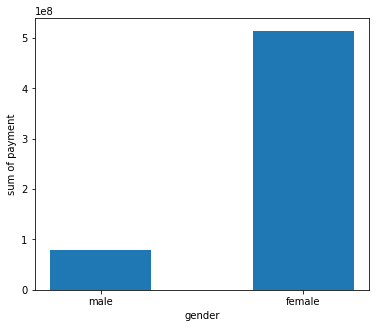

In [18]:
plt.figure(figsize = (6,5))
plt.bar(range(2), gender_pay, width = 0.5)
plt.xlabel('gender')
plt.ylabel('sum of payment')
plt.xticks(range(2), ['male','female'])
plt.show()

# 任务2.2

## 任务2.2-（1）统计会员与非会员订单数

In [19]:
#卡号非空，会员
member_ord = order[order.notnull()['kh']]
member_num = len(member_ord)
#卡号为空，非会员
non_member_ord = order[order.isnull()['kh']]
non_member_num = len(non_member_ord)

print(member_num,non_member_num)

869012 997636


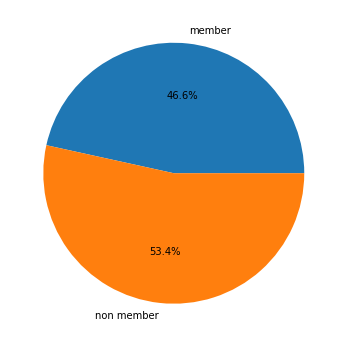

In [20]:
plt.figure(figsize = (6,6))
plt.pie([member_num,non_member_num],labels=['member','non member'],autopct='%1.1f%%',)
plt.show()

## 任务2.2-（2）统计会员与非会员的销售金额

In [21]:
member_cost = np.sum(member_ord['je'])
non_member_cost = np.sum(non_member_ord['je'])

In [22]:
member_cost,non_member_cost

(1189567876.58, 842413549.7599998)

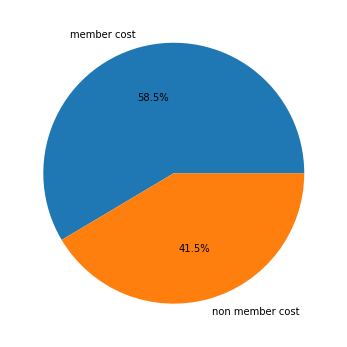

In [23]:
plt.figure(figsize = (6,6))
plt.pie([member_cost,non_member_cost],labels=['member cost','non member cost'],autopct='%1.1f%%',)
plt.show()

## 任务2.2-（3）统计不同年份会员的消费金额

In [24]:
#不同年份的会员消费金额
year_order_cost_list = []
for year in range(2015,2019):
    #查询对应年份的订单
    year_order = member_ord[member_ord['dtime'].apply(lambda x:x.year == year)]
    #加总对应年份的订单金额
    cost_sum = np.sum(year_order['je'])
    year_order_cost_list.append(cost_sum)
        

In [25]:
year_order_cost_list

[304481820.90999997, 349256892.66, 528542015.83000004, 7287147.18]

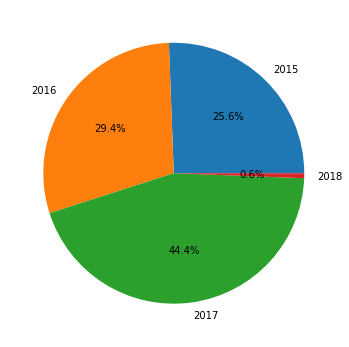

In [26]:
plt.figure(figsize = (6,6))
plt.pie(year_order_cost_list,labels=['2015','2016','2017','2018'],autopct='%1.1f%%',)
plt.show()

## 任务2.2-（4）对不同年份按月份统计会员消费金额

In [27]:
#按不同年份统计会员各月的消费金额
month_cost_list = []

for year in range(2015,2019):
    year_order_list = []
    for month in range(1,13):
        month_order = member_ord[member_ord['dtime'].apply(lambda x:x.year == year and x.month == month)]
        year_order_list.append(np.sum(month_order['je']))
    month_cost_list.append(year_order_list)

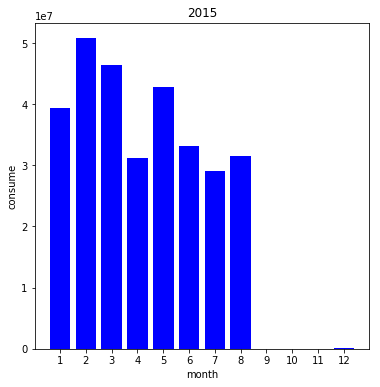

In [28]:
plt.figure(figsize = (6,6))
plt.bar(range(1,13),month_cost_list[0],color = 'blue')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.ylabel('consume')
plt.title('2015')
plt.show()

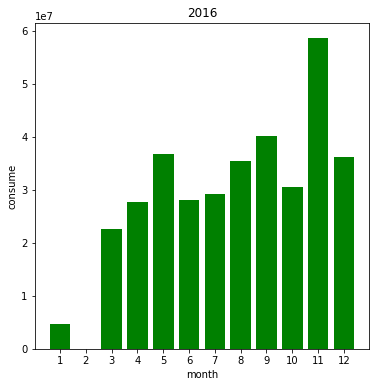

In [29]:
plt.figure(figsize = (6,6))
plt.bar(range(1,13),month_cost_list[1],color = 'green')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.ylabel('consume')
plt.title('2016')
plt.show()

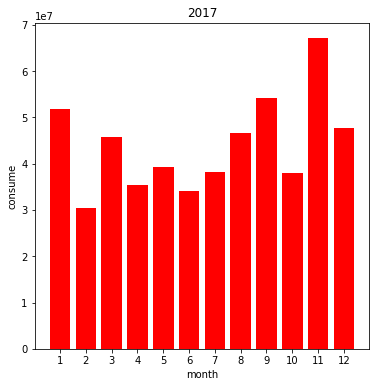

In [30]:
plt.figure(figsize = (6,6))
plt.bar(range(1,13),month_cost_list[2],color = 'red')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.ylabel('consume')
plt.title('2017')
plt.show()